# 1. Know your Data

### Import Libraries

In [1]:
# Importing necessary libraries
# Importing pandas and numpy for data processing and data wrangling
import pandas as pd
import numpy as np

# Importing tools for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import libraries for preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Import Evaluation metric libraries
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Import Model selection libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

# Libraries used for Model Implementation 
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import xgboost as xgb

# Libraries used for warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Load the Dataset

In [2]:
# Loading the dataset
car = pd.read_csv("car data.csv")

### Dataset View

In [3]:
# Displaying first few rows of the Dataset
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


### Dataset Rows and Columns Count

In [4]:
# Displaying the number of rows and columns
print("Number of rows are: ", car.shape[0])
print("Number of columns are: ", car.shape[1])

Number of rows are:  301
Number of columns are:  9


### Dataset Information

In [5]:
# Dataset Information
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


### Duplicate Values

In [6]:
# Check for duplicate row count
dup = car.duplicated().sum()
print("Number of duplicate rows: ", dup)

Number of duplicate rows:  2


### Missing values/Null values

In [7]:
# Check for Missing/Null value count
car.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

##### Things we found about the dataset:
The car dataset includes details such as car names, prices, and the number of previous owners for various vehicles. It contains 301 rows and 9 columns. There are 2 duplicate rows in the dataset, and no null values are present.

# 2. Understanding the Variables

In [8]:
# Dataset columns
car.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [9]:
# Dataset describe
car.describe(include = 'all').round(2)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
count,301,301.00,301.00,301.00,301.00,301,301,301,301.00
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.63,4.66,7.63,36947.21,NaN,NaN,NaN,0.04
std,NaN,2.89,5.08,8.64,38886.88,NaN,NaN,NaN,0.25
min,NaN,2003.00,0.10,0.32,500.00,NaN,NaN,NaN,0.00
25%,NaN,2012.00,0.90,1.20,15000.00,NaN,NaN,NaN,0.00
50%,NaN,2014.00,3.60,6.40,32000.00,NaN,NaN,NaN,0.00
75%,NaN,2016.00,6.00,9.90,48767.00,NaN,NaN,NaN,0.00


### Check for unique values

In [10]:
for i in car.columns.tolist():
    print("Number of unique values in", i, "is", car[i].nunique())

Number of unique values in Car_Name is 98
Number of unique values in Year is 16
Number of unique values in Selling_Price is 156
Number of unique values in Present_Price is 148
Number of unique values in Driven_kms is 206
Number of unique values in Fuel_Type is 3
Number of unique values in Selling_type is 2
Number of unique values in Transmission is 2
Number of unique values in Owner is 3


# 3. Data Wrangling

In [11]:
# Adding a 'Constant Year' column with value of 2024 to the Dataframe
car['Current Year'] = 2024

# Calculating the age of vehicles by subtracting the 'Year' column from the 'Current Year' column
car['how_old'] = car['Current Year'] - car['Year']

In [12]:
# Remove the 'Current Year' from the Dataframe as it is no longer needed
car.drop(['Current Year'], axis = 1, inplace = True)

In [13]:
# Displaying the updated Dataframe
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,how_old
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


In [14]:
# Defining dependent variable
dependent_variable = ['Selling_Price']

Here is a refined version of the manipulations performed and the insights gained:

- Added a new column, 'how_old', by subtracting the 'Year' column from the Current Year (2024).
- Dropped the 'Current Year' column from the DataFrame.

# 4. Data Visualization, Storytelling and Experimenting with Charts: Understand the relationships between variables

### Chart 1 - Top 10 most Selling Cars

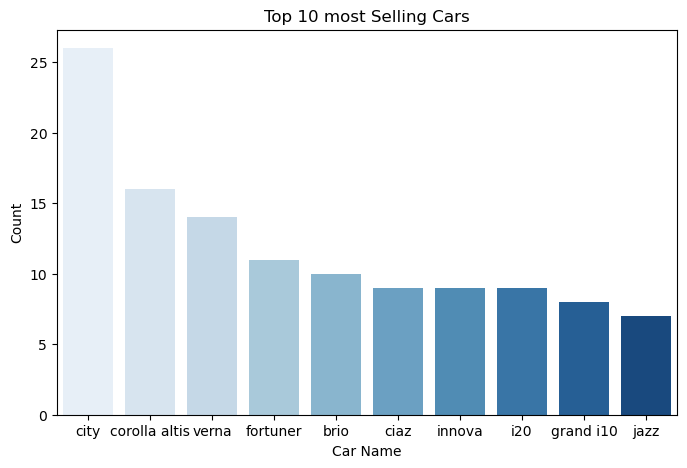

In [15]:
# Chart 1 - Count Plot visualisation code for top 10 most selling cars
top10 = car['Car_Name'].value_counts()[:10]

# Create a count plot to visualize top 10 most selling cars
plt.figure(figsize = (8, 5))
sns.countplot(x = 'Car_Name', data = car, order = top10.index, palette = 'Blues')

# Set labels and titles for the plot
plt.xlabel('Car Name')
plt.ylabel('Count')
plt.title('Top 10 most Selling Cars')

# Display the plot
plt.show()

From the chart, we can see that 'city' is the top-selling car, followed by 'corolla Altis', 'verna', 'fortuner', and 'brio'.

### Chart 2 - Number of Cars Bought Each Year

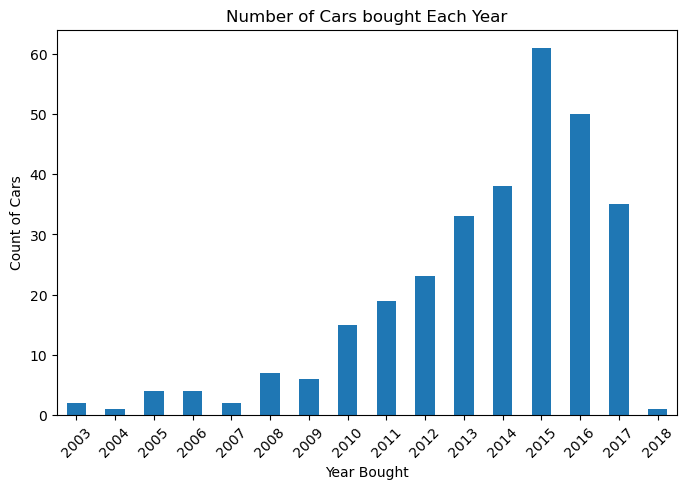

In [16]:
# Bar plot visualisation for Number of Cars Bought Each Year
# create a figure
plt.figure(figsize = (8, 5))

# Group the Data by the 'Year' column 
yearly_counts = car.groupby('Year').count()['Car_Name']

# Create a bar plot to visualise the count of cars bought each year
yearly_counts.plot(kind = 'bar')
plt.xticks(rotation = 45)

# Set the labels and title for the plot
plt.xlabel('Year Bought')
plt.ylabel('Count of Cars')
plt.title('Number of Cars bought Each Year')

# Display the plot
plt.show()

The chart indicates that 2015 had the highest number of car purchases, making it the most popular year for buying cars, followed by 2016 and 2014.

### Chart 3 - Distribution of categorical variable

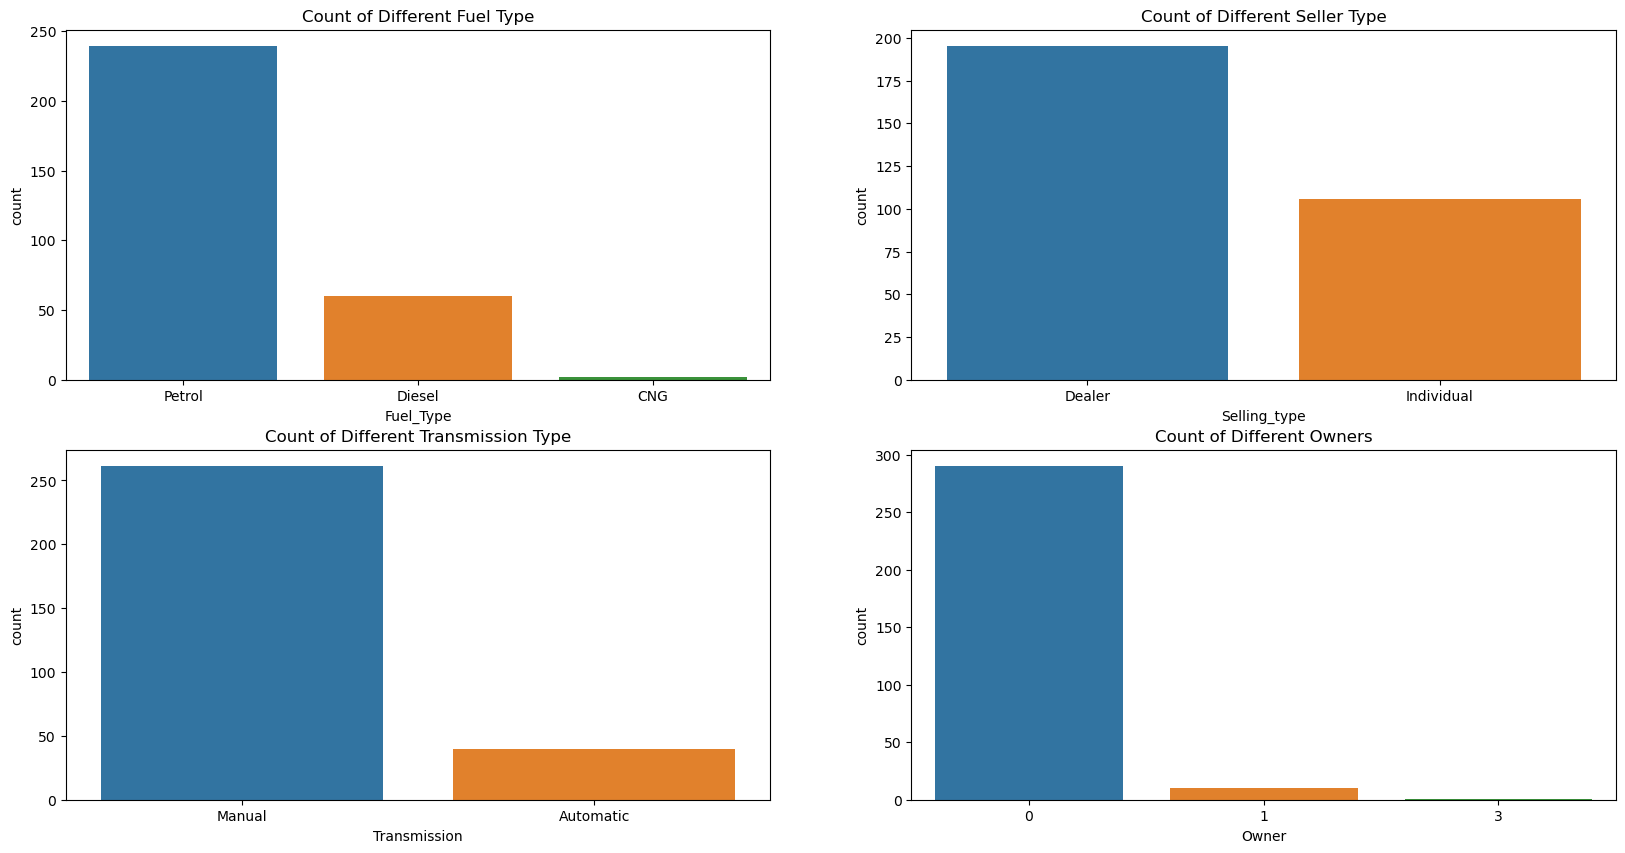

In [17]:
# Chart 3 - Count Plot Visualisation of categorical variable
# Create a figure with 4 subplots 
plt.figure(figsize = (20, 10))

# Subplot 1: Count of Different fuel types
plt.subplot(2, 2, 1)
sns.countplot(x = 'Fuel_Type', data = car)
plt.title("Count of Different Fuel Type")

# Subplot 2: Count of Different seller types
plt.subplot(2, 2, 2)
sns.countplot(x = 'Selling_type', data = car)
plt.title("Count of Different Seller Type")

# Subplot 3: Count of Different transmission types
plt.subplot(2, 2, 3)
sns.countplot(x = 'Transmission', data = car)
plt.title("Count of Different Transmission Type")

# Subplot 1: Count of Different Owners
plt.subplot(2, 2, 4)
sns.countplot(x = 'Owner', data = car)
plt.title("Count of Different Owners")

# Display the plots
plt.show()

### Insights from the Chart:

1. The number of cars with 'Fuel_Type' as Petrol is significantly higher compared to Diesel and CNG.
2. Most cars are sold through Dealers rather than Individual sellers.
3. Manual cars are much more prevalent than Automatic cars.
4. The majority of cars are sold by First Owners, with a negligible number sold by Third or Fourth Owners.

### Chart 4 - Categorical Variable vs Target Variable

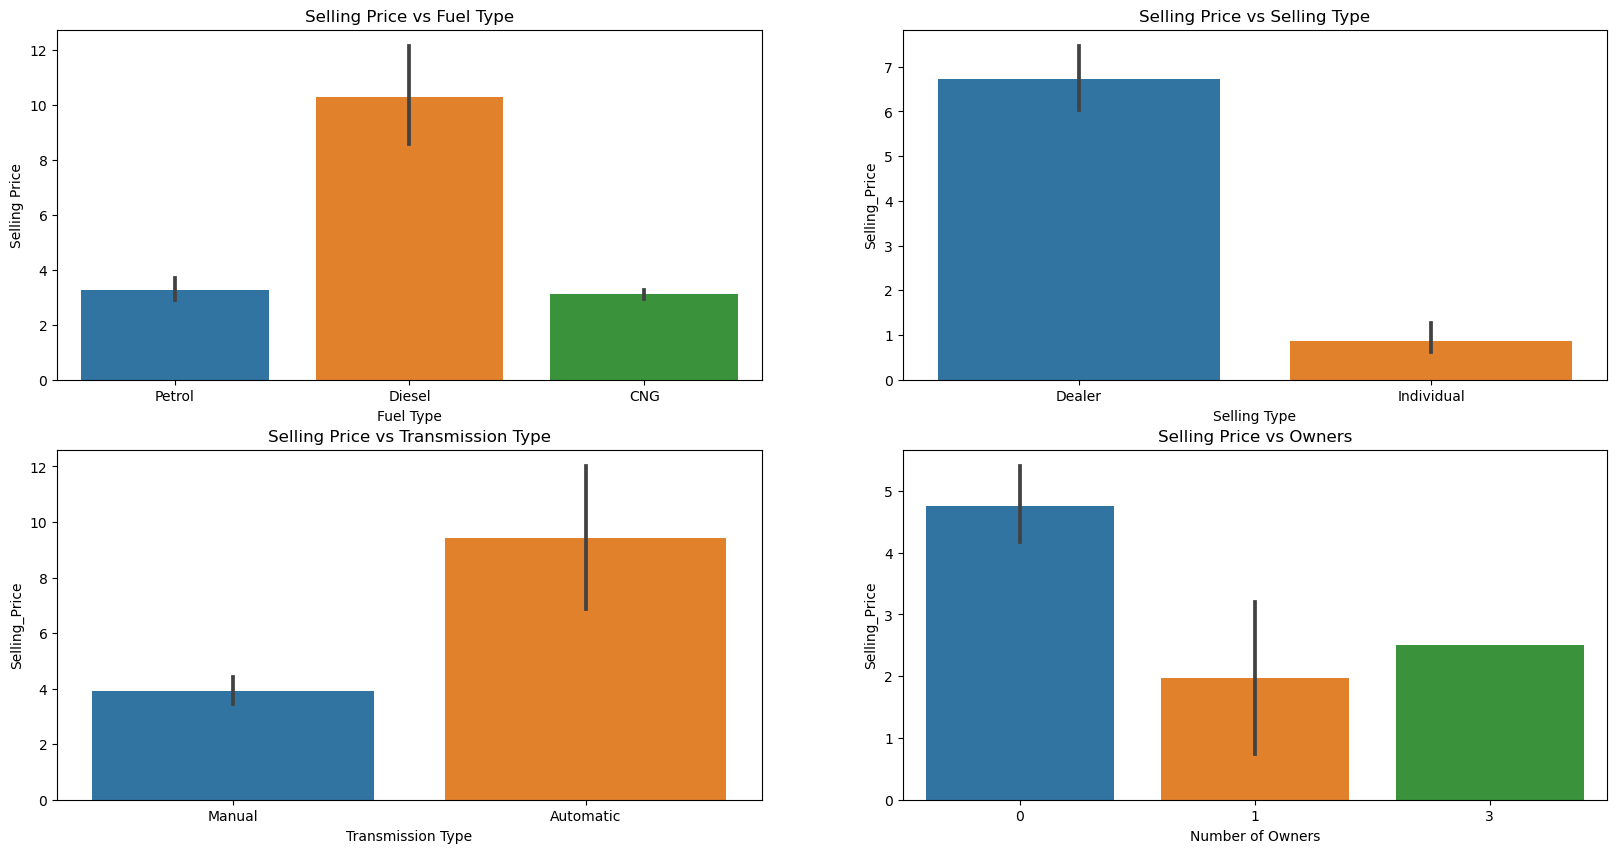

In [18]:
# Chart 4 - Bar Plot Visualisation of Categorical Variable vs Target Variable
# Create a figure with 4 subplots 
plt.figure(figsize = (20, 10))

# Subplot 1: Bar plot for Selling_Price vs Fuel_Types
plt.subplot(2, 2, 1)
sns.barplot(x = 'Fuel_Type', y = 'Selling_Price', data = car)
plt.xlabel('Fuel Type')
plt.ylabel('Selling Price')
plt.title("Selling Price vs Fuel Type")

# Subplot 2: Count of Different seller types
plt.subplot(2, 2, 2)
sns.barplot(x = 'Selling_type', y = 'Selling_Price', data = car)
plt.xlabel('Selling Type')
plt.ylabel('Selling_Price')
plt.title("Selling Price vs Selling Type")

# Subplot 3: Count of Different transmission types
plt.subplot(2, 2, 3)
sns.barplot(x = 'Transmission', y = 'Selling_Price', data = car)
plt.xlabel('Transmission Type')
plt.ylabel('Selling_Price')
plt.title("Selling Price vs Transmission Type")

# Subplot 1: Count of Different Owners
plt.subplot(2, 2, 4)
sns.barplot(x = 'Owner', y = 'Selling_Price', data = car)
plt.xlabel('Number of Owners')
plt.ylabel('Selling_Price')
plt.title("Selling Price vs Owners")

# Display the plots
plt.show()

### Insights from the Chart:

1. Cars with 'Fuel_Type' Diesel have a higher 'Selling_Price' compared to Petrol and CNG cars, which have similar and lower prices.
2. Cars sold by 'Seller_Type' Dealers have a higher price range, while those sold by Individual sellers are less expensive.
3. Cars with Automatic 'Transmission' are more costly than those with Manual Transmission.
4. First Owner cars have the highest 'Selling_Price', and the price decreases as the number of previous owners increases.

### Chart 5 - Driven Kilometers vs Selling Price

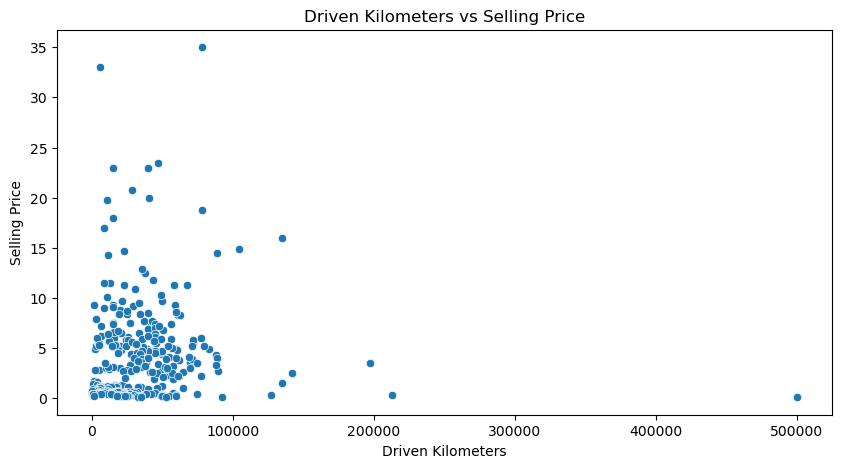

In [19]:
# Scatterplot Visualisaion for Driven Kilometers vs Selling Price
# Set the Figure size of the plot
plt.figure(figsize = (10, 5))

# Create a scatter plot to visualize the relationship between driven kilometers vs selling price
sns.scatterplot(x = 'Driven_kms', y = 'Selling_Price', data = car)

# Set the labels and title for the plot
plt.xlabel('Driven Kilometers')
plt.ylabel('Selling Price')
plt.title('Driven Kilometers vs Selling Price')

# Display the plot
plt.show()

### Chart 6 - Correlation Heatmap


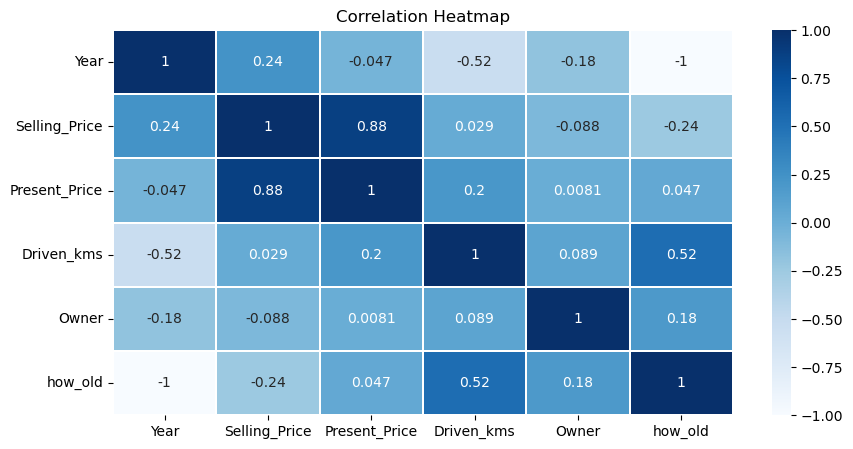

In [20]:
# Correlation Heatmap
# Set the size of the figure 
plt.figure(figsize = (10, 5))

# Converting String Datatypes into numerical datatypes
numerical_columns = car.select_dtypes(include = ['float64', 'int64'])
corr_matrix = numerical_columns.corr()

# Create a heatmap of the correlation matrix with annotations
sns.heatmap(corr_matrix, annot = True, linewidths = 0.1, cmap = 'Blues')

# Set the title for the heatmap
plt.title("Correlation Heatmap")

# Display the plot
plt.show()

# 5. Feature Engineering and Data Preprocessing

### 1. Handling outliers

In [21]:
# Handling Outliers & Outlier treatments
# Removing outliers by Using IQR method:
q1, q3, median = car['Selling_Price'].quantile([0.25, 0.75, 0.5])
lower_bound = q1 - 1.5 * (q3 - q1)
upper_bound = q3 + 1.5 * (q3 - q1)
car['Selling_Price'] = np.where(
    car['Selling_Price'] > upper_bound,
    median,
    np.where(car['Selling_Price'] < lower_bound, median, car['Selling_Price'])
)

Here, I employed two main techniques for outlier treatment: the IQR method and Capping method. Using the IQR method, I calculated the upper and lower bounds based on the quartiles of the Selling Price data. Any values outside these limits were replaced with the median of the Selling Price column. Additionally, I applied capping by setting a threshold at the 99th percentile for columns like Present_Price, Driven_kms, Owner, and no_year. Values exceeding this threshold were replaced with the 99th percentile value to manage extreme outliers effectively.

### 2. Categorical Encoding

In [22]:
# Before Categorical Encoding, Remove Car Name
car.drop(['Car_Name'], axis = 1, inplace = True)

In [23]:
# Using one-hot encoding convert categorical variables into numerical variables
car = pd.get_dummies(car)

I have utilized one hot encoding to transform categorical variables into a numerical format. This technique was chosen because it effectively converts categorical data into a format that machine learning algorithms can directly process, ensuring each category is represented by binary indicators without imposing ordinality or hierarchy among categories.

### 3. Feature Manipulation and Feature Selection

#### 1. Feature Manipulation

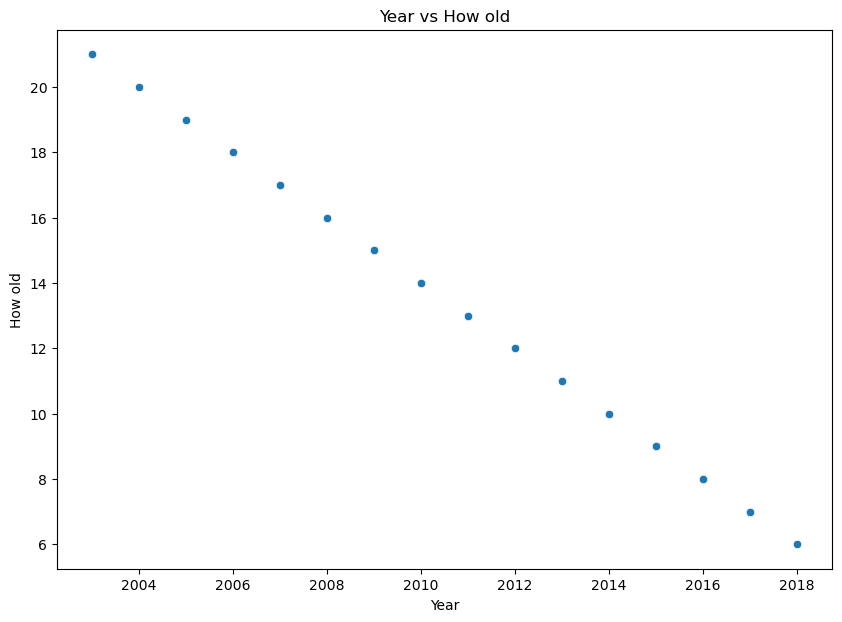

In [24]:
# Manipulate Features to minimize feature correlation and create new features
# We have seen that Year and how_old are negatively higly correlated

# Plotting scatter plot to visualize the relationship between year and how old
plt.figure(figsize = (10, 7))

# Create a scatter plot to visualize the relationship between year and how old
sns.scatterplot(x = 'Year', y = 'how_old', data = car)

# Set the labels and title for the plot
plt.xlabel('Year')
plt.ylabel('How old')
plt.title('Year vs How old')

# Display the plot
plt.show()

In [25]:
# Correlation
car[['Year', 'how_old']].corr()

,Year,how_old
Year,1.0,-1.0
how_old,-1.0,1.0


In [26]:
# Removing 'Year' column as we have already calculated the age in the 'how_old' column
car.drop(['Year'], axis = 1, inplace = True)

#### 2. Feature Selection

In [27]:
# Feature Selection to avoid overfitting
features = [i for i in car.columns if i not in ['Selling_Price']]
features

['Present_Price',
 'Driven_kms',
 'Owner',
 'how_old',
 'Fuel_Type_CNG',
 'Fuel_Type_Diesel',
 'Fuel_Type_Petrol',
 'Selling_type_Dealer',
 'Selling_type_Individual',
 'Transmission_Automatic',
 'Transmission_Manual']

In [28]:
# Reomove multicollinearity using VIF technique
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(x):
    # Calculating VIF
    vif = pd.DataFrame()
    vif['variables'] = x.columns
    vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    return vif

In [29]:
continuous_variable = ['Present_Price', 'Driven_kms', 'Owner', 'how_old']

In [30]:
continuous_feature_car = pd.DataFrame(car[continuous_variable])
continuous_feature_car

,Present_Price,Driven_kms,Owner,how_old
0,5.59,27000,0,10
1,9.54,43000,0,11
2,9.85,6900,0,7
3,4.15,5200,0,13
4,6.87,42450,0,10
...,...,...,...,...
296,11.60,33988,0,8
297,5.90,60000,0,9
298,11.00,87934,0,15
299,12.50,9000,0,7


In [31]:
calc_vif(car[[i for i in continuous_feature_car]])

,variables,VIF
0,Present_Price,1.760887
1,Driven_kms,2.474651
2,Owner,1.049682
3,how_old,2.929642


### Feature Selection Methods we have used 
Here we have utilized the following feature selection methods:
- Pearson Correlation Coefficient: This method was employed to assess the correlation between variables and their relationship with the dependent variable.
- Variance Inflation Factor (VIF): This method was used to check for multicollinearity among the predictor variables.

#### Important Features Identified 
From the methods mentioned above, I identified a high negative correlation between the 'Year' and 'how_old' variables. Consequently, I decided to retain only the 'how_old' variable and drop the 'Year' column, as the 'how_old' column already represents the calculated age. This decision helps to eliminate redundancy and potential multicollinearity in the model.

### 4. Data Transformation

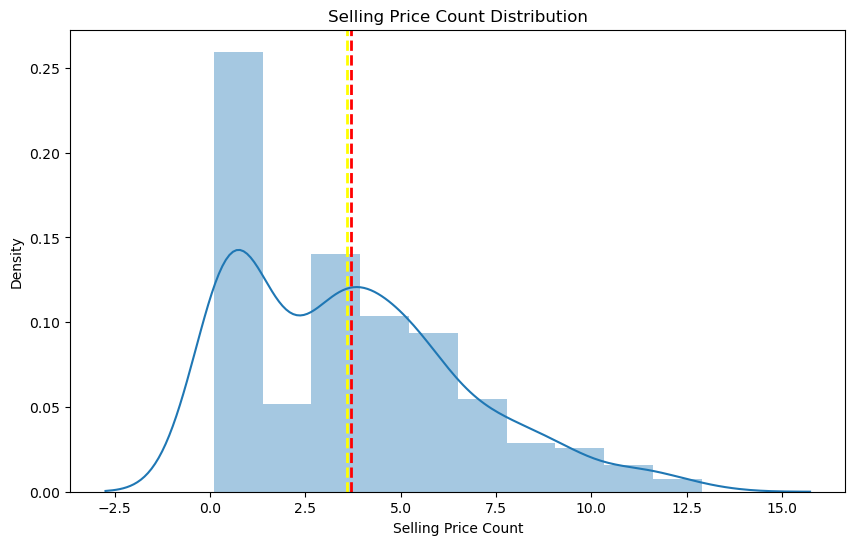

In [32]:
# Transform the data
# Visualizing the distribution of the dependent variable - Selling Price
# Create a figure to visualize the plot
plt.figure(figsize = (10, 6))
sns.distplot( car['Selling_Price'])

# Set the label and title for the plot
plt.xlabel('Selling Price Count')
plt.title('Selling Price Count Distribution')

plt.axvline(car['Selling_Price'].mean(), color = 'red', linestyle = 'dashed', linewidth = 2)
plt.axvline(car['Selling_Price'].median(), color = 'yellow', linestyle = 'dashed', linewidth = 2)

# Display the plot
plt.show()

In [33]:
# Skew for the dependent variable
car['Selling_Price'].skew()

0.7570161884001796

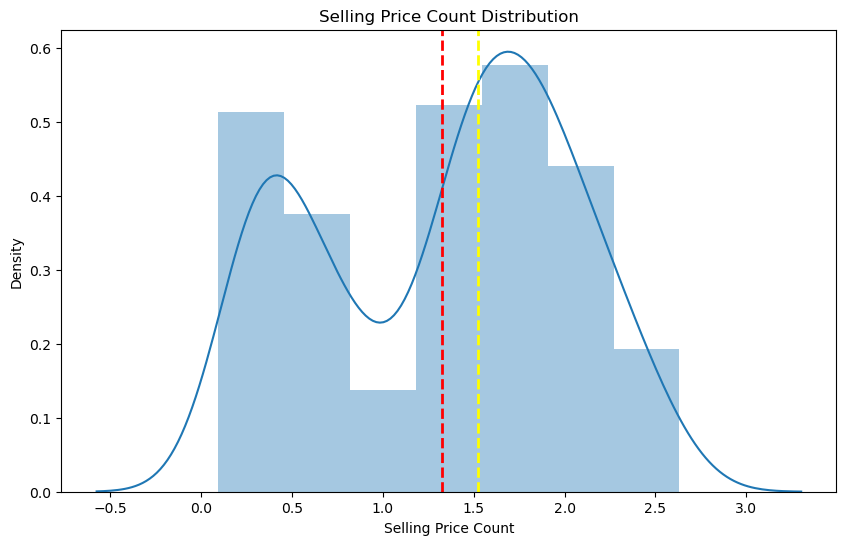

In [34]:
# Visualizing the distribution of the dependent variable after log transformation
# Create a figure to visualize the plot
plt.figure(figsize = (10, 6))
sns.distplot(np.log1p(car['Selling_Price']))

# Set the label and title for the plot
plt.xlabel('Selling Price Count')
plt.title('Selling Price Count Distribution')

plt.axvline(np.log1p(car['Selling_Price']).mean(), color = 'red', linestyle = 'dashed', linewidth = 2)
plt.axvline(np.log1p(car['Selling_Price']).median(), color = 'yellow', linestyle = 'dashed', linewidth = 2)

# Display the plot
plt.show()

In [35]:
# Skewness of the dependent variable after log transformation
np.log1p(car['Selling_Price']).skew()

-0.2223561302783033

In [36]:
# Defining dependent and independent variables
x = car.drop('Selling_Price', axis = 1)
y = np.log1p(car['Selling_Price'])

In [37]:
features

['Present_Price',
 'Driven_kms',
 'Owner',
 'how_old',
 'Fuel_Type_CNG',
 'Fuel_Type_Diesel',
 'Fuel_Type_Petrol',
 'Selling_type_Dealer',
 'Selling_type_Individual',
 'Transmission_Automatic',
 'Transmission_Manual']

I plotted a distribution plot and conducted a normality test, revealing that the data is not normally distributed and requires transformation.

After calculating the skewness value, I found that the 'selling price' attribute is positively skewed. To address this, I applied a log transformation. This transformation normalized the data distribution and significantly reduced the skewness.

### 5. Data Scaling

In [38]:
features = [i for i in car.columns if i not in ['Selling_Price']]

In [39]:
# Scaling the data
scaler = StandardScaler()
x = scaler.fit_transform(car[features])

### 6. Data Splitting

In [40]:
# Splitting the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [41]:
# checking the train distribution of dependent variable
y_train.value_counts()

Selling_Price
1.526056    11
0.470004     6
1.832581     5
0.182322     5
1.749200     5
            ..
0.095310     1
2.008214     1
2.301585     1
1.824549     1
0.974560     1
Name: count, Length: 112, dtype: int64

# 6. Model Implementarion

In [42]:
# defining a function to print evaluation matrix
def evaluate_model(model, y_test, y_pred):
    '''This function takes a model, along with y_test and y_pred values, to:
        1. Print evaluation metrics
        2. Plot actual versus predicted values
        3. Plot the top 5 important features
        4. Return a list of the model scores'''
    
    # Apply inverse log transformation to y_test, y_pred as we have used log transformation
    y_test1 = np.exp(y_test)
    y_pred1 = np.exp(y_pred)
    y_train1 = np.exp(y_train)
    y_train_pred = np.exp(model.predict(x_train))

    # Calculating Evaluation matrix
    mse = mean_squared_error(y_test1, y_pred1)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test1, y_pred1)
    r2_train = r2_score(y_train1, y_train_pred)
    r2 = r2_score(y_test1, y_pred1)
    r2_adjusted = 1 - (1 - r2) * ((len(x_test) - 1) / (len(x_test) - x_test.shape[1] - 1))
    
    # Printing Evaluation Metric
    print("MSE :", mse)
    print("RMSE :", rmse)
    print("MAE :", mae)
    print("Train R2 :", r2_train)
    print("Test R2 :", r2)
    print("Adjusted R2 :", r2_adjusted)
    
    # Plot actual and predicted values
    plt.figure(figsize = (10, 5))
    plt.plot((y_pred1)[:100], label = 'Actual')
    plt.plot((np.array(y_test1)[:100]), label = 'Predicted')
    plt.legend()
    plt.title("Actual and Predicted Selling Price", fontsize = 16)
    plt.show()
    
    model_score = [mse, rmse, mae, r2_train, r2, r2_adjusted]
    return model_score

In [43]:
# Create a score dataframe
score = pd.DataFrame(index = ['MSE', 'RMSE', 'MAE', 'Train R2', 'Test R2', 'Adjusted R2'])

### Model 1: Linear Regression

In [44]:
# Import the Linear Regression class
reg = LinearRegression()

# Fit the Linear Regression Model to the training data
reg.fit(x_train, y_train)

# Predict on the model
y_pred_linear = reg.predict(x_test)

#### 1. Model and its performance

MSE : 3.0427355009286186
RMSE : 1.7443438597159158
MAE : 1.149840759104489
Train R2 : 0.6183750129085761
Test R2 : 0.635721288695422
Adjusted R2 : 0.5849989364884554


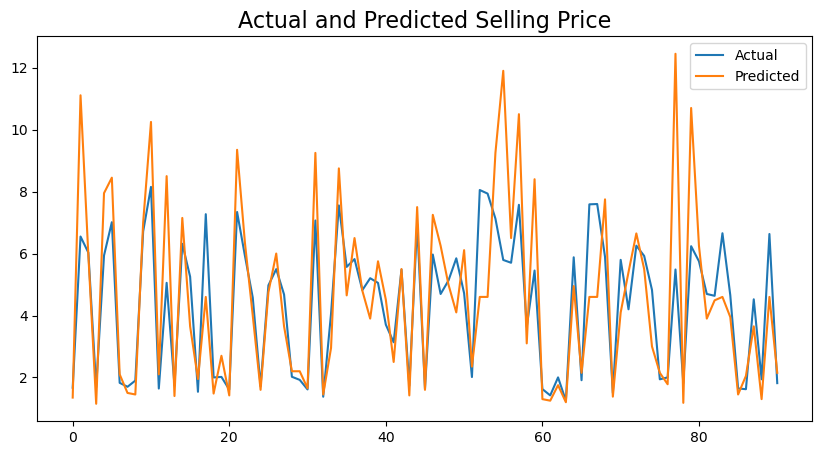

In [45]:
# Visualising evaluation metric score chart
linear_score = evaluate_model(reg, y_test, y_pred_linear)
score['Linear Regression'] = linear_score

In [46]:
# Update Evaluation Metric Score Chart
score

,Linear Regression
MSE,3.042736
RMSE,1.744344
MAE,1.149841
Train R2,0.618375
Test R2,0.635721
Adjusted R2,0.584999


#### 2. Cross-Validation and Hyperparameter Tuning

In [47]:
# Define the model
lr = LinearRegression()

# Define the parameters to be optimized
param_grid = {'fit_intercept' : [True, False]}

# Perform grid search
grid_search = GridSearchCV(lr, param_grid, cv = 5, scoring = 'r2')
grid_search.fit(x_train, y_train)

# Print the best parameters
best_params = grid_search.best_params_
print("Best parameters: ", best_params)

Best parameters:  {'fit_intercept': True}


In [48]:
# Train a new model using the best parameters
lr_model2 = LinearRegression(fit_intercept = best_params['fit_intercept'])

# Fit the Linear Regression Model to the training data
lr_model2.fit(x_train, y_train)

LinearRegression()

In [49]:
# Predict on the model
y_pred_linear2 = lr_model2.predict(x_test)

MSE : 3.0427355009286186
RMSE : 1.7443438597159158
MAE : 1.149840759104489
Train R2 : 0.6183750129085761
Test R2 : 0.635721288695422
Adjusted R2 : 0.5849989364884554


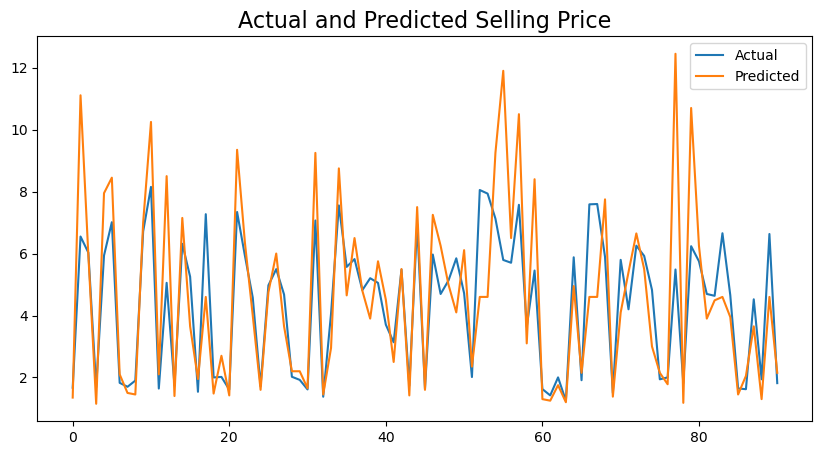

In [50]:
# Visualizing the Evaluation Score Chart
lr2_score = evaluate_model(lr_model2, y_test, y_pred_linear2)

In [51]:
# Update the Evaluation Metric Score Chart
score['Linear Regression Tuned'] = lr2_score
score

,Linear Regression,Linear Regression Tuned
MSE,3.042736,3.042736
RMSE,1.744344,1.744344
MAE,1.149841,1.149841
Train R2,0.618375,0.618375
Test R2,0.635721,0.635721
Adjusted R2,0.584999,0.584999


The MSE, RMSE, MAE, Train R2, Test R2, Adjusted R2 value for both tuned and untuned linear regression model is same.

### Model 2 - Lasso Regression

In [52]:
# Model 2 implementation
lasso = Lasso()

# Fit the model to the training data
lasso.fit(x_train, y_train)

# prediction
y_pred_lasso1 = lasso.predict(x_test)

#### 1. Model and its performance

MSE : 8.987787023296347
RMSE : 2.997963812873055
MAE : 2.367435107223134
Train R2 : -0.10221208147068772
Test R2 : -0.07602500228073916
Adjusted R2 : -0.22585126842109537


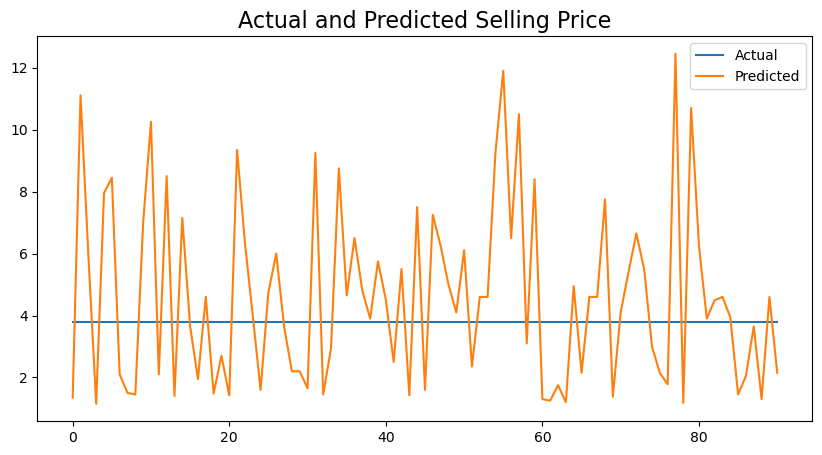

In [53]:
# Visualizing evaluation metric score chart
lasso_score = evaluate_model(lasso, y_test, y_pred_lasso1)

In [54]:
# Update Evaluation Metric Score Chart
score['Lasso Regression'] = lasso_score
score

,Linear Regression,Linear Regression Tuned,Lasso Regression
MSE,3.042736,3.042736,8.987787
RMSE,1.744344,1.744344,2.997964
MAE,1.149841,1.149841,2.367435
Train R2,0.618375,0.618375,-0.102212
Test R2,0.635721,0.635721,-0.076025
Adjusted R2,0.584999,0.584999,-0.225851


#### 2. Cross-Validation and Hyperparameter Tuning

In [55]:
# Define Model
lasso_reg = Lasso()

# Define the parameters to be optimized 
params = {'alpha' : [1e-15, 1e-10, 1e-8, 1e-5, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60, 100]}

# Perform grid search 
grid_search = GridSearchCV(lasso_reg, params, cv = 5, scoring = 'neg_mean_squared_error')

# Fit the model
grid_search.fit(x_train, y_train)

# Print the best parameters
best_params = grid_search.best_params_
print("Best parameters: ", best_params)

Best parameters:  {'alpha': 0.01}


In [56]:
# Train a new model with best parameters
lasso2 = Lasso(alpha  = best_params['alpha'])

# Fit the model to the training data
lasso2.fit(x_train, y_train)

# Prediction
y_pred_lasso2 = lasso2.predict(x_test)

MSE : 3.0645075812600098
RMSE : 1.7505735006734249
MAE : 1.1711488262854797
Train R2 : 0.6122901562401
Test R2 : 0.6331147179425194
Adjusted R2 : 0.582029425504136


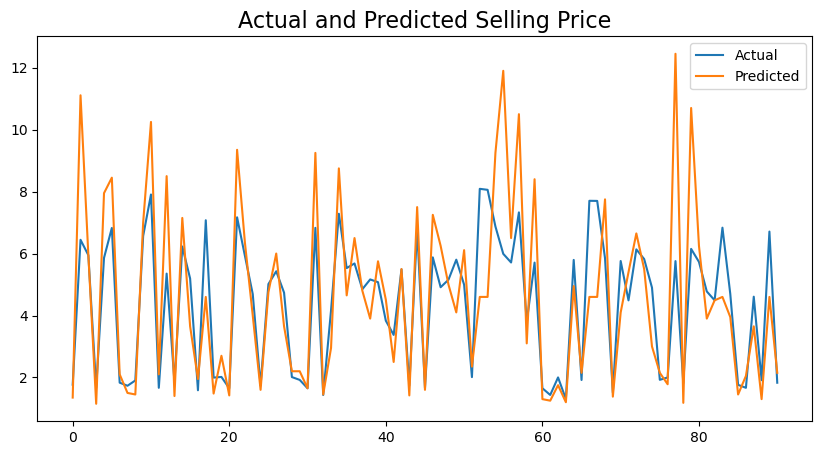

In [57]:
# Visualizing Evaluation metric score chart
lasso2_score = evaluate_model(lasso2, y_test, y_pred_lasso2)

In [58]:
# Update the Evaluation metric score chart
score['Lasso Regression Tuned'] = lasso2_score
score

,Linear Regression,Linear Regression Tuned,Lasso Regression,Lasso Regression Tuned
MSE,3.042736,3.042736,8.987787,3.064508
RMSE,1.744344,1.744344,2.997964,1.750574
MAE,1.149841,1.149841,2.367435,1.171149
Train R2,0.618375,0.618375,-0.102212,0.612290
Test R2,0.635721,0.635721,-0.076025,0.633115
Adjusted R2,0.584999,0.584999,-0.225851,0.582029


It is approximately 65% increase in test set performance in lasso regression tuned than the original one.

### Model 3 - Ridge Regression

In [59]:
# Model 3 - Implementation
ridge = Ridge()

# Fit the model to the training set
ridge.fit(x_train, y_train)

# Prediction
y_pred_ridge = ridge.predict(x_test)

#### 1. Model and its performance

MSE : 3.0479676758147263
RMSE : 1.7458429699760303
MAE : 1.1510244458435699
Train R2 : 0.6177751249243941
Test R2 : 0.6350948885616443
Adjusted R2 : 0.5842853160828859


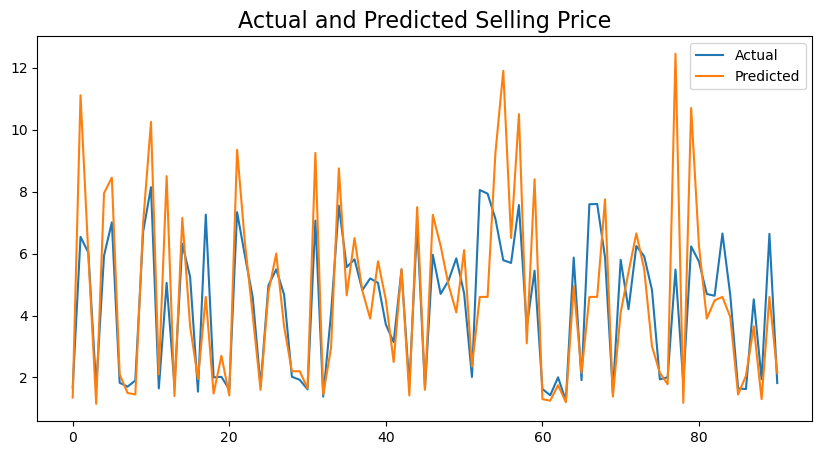

In [60]:
# Visualizing the Evaluation Metric Score Chart
ridge_score = evaluate_model(ridge, y_test, y_pred_ridge)

In [61]:
# Update the Evaluation Metric Score Chart
score['Ridge Regression'] = ridge_score
score

,Linear Regression,Linear Regression Tuned,Lasso Regression,Lasso Regression Tuned,Ridge Regression
MSE,3.042736,3.042736,8.987787,3.064508,3.047968
RMSE,1.744344,1.744344,2.997964,1.750574,1.745843
MAE,1.149841,1.149841,2.367435,1.171149,1.151024
Train R2,0.618375,0.618375,-0.102212,0.612290,0.617775
Test R2,0.635721,0.635721,-0.076025,0.633115,0.635095
Adjusted R2,0.584999,0.584999,-0.225851,0.582029,0.584285


#### 2. Cross-Validation and Hyperparameter Tuning

In [62]:
# Model Defination
ridge1 = Ridge()

# Defining the parameters to be optimized
params = {'alpha': [1e-15, 1e-10, 1e-8, 1e-5, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60, 100]}

# Perform Grid search
grid_search = GridSearchCV(ridge1, params, cv = 5, scoring = 'neg_mean_squared_error')

# Fit the model
grid_search.fit(x_train, y_train)

# Print the best parameters
best_params = grid_search.best_params_
print("Best Parameters are: ", best_params)

Best Parameters are:  {'alpha': 55}


In [63]:
# Train a new model with the best parameters
ridge_model2 = Ridge(alpha = best_params['alpha'])

# Fit the model
ridge_model2.fit(x_train, y_train)

# Prediction
y_pred_ridge2 = ridge_model2.predict(x_test)

MSE : 3.310352280208161
RMSE : 1.8194373526472851
MAE : 1.2081181689060132
Train R2 : 0.5860092978561791
Test R2 : 0.6036819952866845
Adjusted R2 : 0.5484984756430583


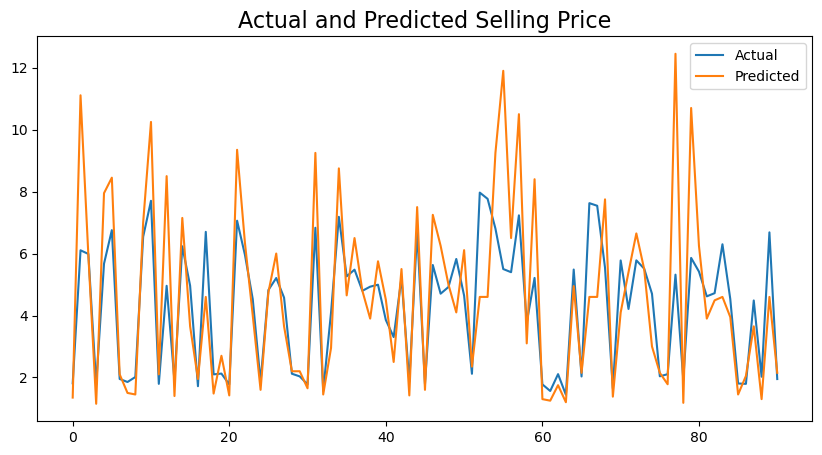

In [64]:
# Visualising Evaluation metric Score Chart
ridge2_score = evaluate_model(ridge_model2, y_test, y_pred_ridge2)

In [65]:
# Update the Evaluation Metric Score Chart
score['Ridge Regression Tuned'] = ridge2_score
score

,Linear Regression,Linear Regression Tuned,Lasso Regression,Lasso Regression Tuned,Ridge Regression,Ridge Regression Tuned
MSE,3.042736,3.042736,8.987787,3.064508,3.047968,3.310352
RMSE,1.744344,1.744344,2.997964,1.750574,1.745843,1.819437
MAE,1.149841,1.149841,2.367435,1.171149,1.151024,1.208118
Train R2,0.618375,0.618375,-0.102212,0.612290,0.617775,0.586009
Test R2,0.635721,0.635721,-0.076025,0.633115,0.635095,0.603682
Adjusted R2,0.584999,0.584999,-0.225851,0.582029,0.584285,0.548498


From the metrics, we can conclude that the original Ridge Regression model performs better overall compared to the tuned Ridge Regression model.

### Model 4 - Decision Tree

In [66]:
# Model 4 - Implementation
dt = DecisionTreeRegressor(random_state = 42)

# Fit the model to the training data
dt.fit(x_train, y_train)

# Prediction
y_pred_dt = dt.predict(x_test)

#### 1. Model and its performance

MSE : 1.5251857142857146
RMSE : 1.2349840947500963
MAE : 0.6486813186813187
Train R2 : 1.0
Test R2 : 0.8174035546860415
Adjusted R2 : 0.7919787331866296


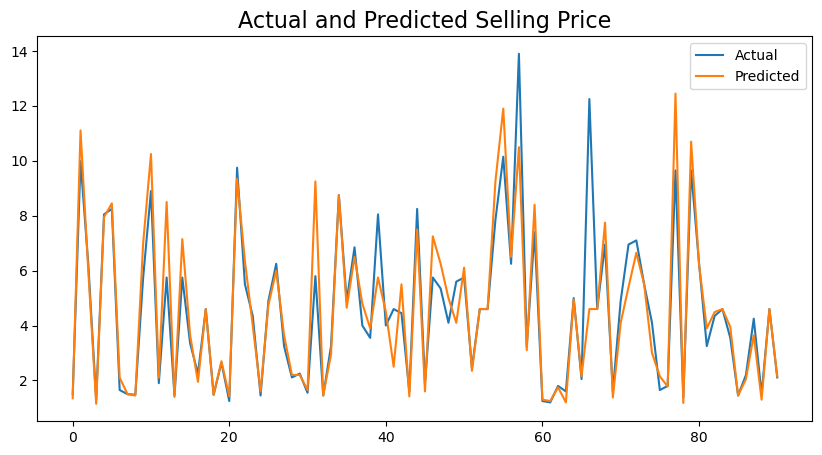

In [67]:
# Visualizing Evaluation Metric Score Chart
dt_score = evaluate_model(dt, y_test, y_pred_dt)

In [68]:
# Update Evaluation Metric Score Chart
score['Decision Tree'] = dt_score
score

,Linear Regression,Linear Regression Tuned,Lasso Regression,Lasso Regression Tuned,Ridge Regression,Ridge Regression Tuned,Decision Tree
MSE,3.042736,3.042736,8.987787,3.064508,3.047968,3.310352,1.525186
RMSE,1.744344,1.744344,2.997964,1.750574,1.745843,1.819437,1.234984
MAE,1.149841,1.149841,2.367435,1.171149,1.151024,1.208118,0.648681
Train R2,0.618375,0.618375,-0.102212,0.612290,0.617775,0.586009,1.000000
Test R2,0.635721,0.635721,-0.076025,0.633115,0.635095,0.603682,0.817404
Adjusted R2,0.584999,0.584999,-0.225851,0.582029,0.584285,0.548498,0.791979


#### 2. Cross-Validation and Hyperparameter Tuning

In [69]:
# Defining Model
Dt = DecisionTreeRegressor(random_state = 42)

# Define the parameters to be optimized
params = {'max_depth': [8, 10, 12, 14, 16],
         'min_samples_split': np.arange(35, 50),
         'min_samples_leaf': np.arange(22, 31, 2)}

# Perform grid search
grid_search = GridSearchCV(Dt, params, cv = 5, scoring = 'neg_mean_squared_error')

# fit the model
grid_search.fit(x_train, y_train)

# Print the best Paramters
best_params = grid_search.best_params_
print("Best parameters are: ", best_params)

Best parameters are:  {'max_depth': 8, 'min_samples_leaf': 22, 'min_samples_split': 35}


In [70]:
# Train a new model with the best parameters
dt_model2 = DecisionTreeRegressor(max_depth = best_params['max_depth'],
                                 min_samples_leaf = best_params['min_samples_leaf'],
                                 min_samples_split = best_params['min_samples_split'])

# Fit the model to the Training set
dt_model2.fit(x_train, y_train)

# Prediction
y_pred_dt2 = dt_model2.predict(x_test)

MSE : 2.2995674215815027
RMSE : 1.5164324652227354
MAE : 1.018994387240728
Train R2 : 0.7569937121296288
Test R2 : 0.7246939615237515
Adjusted R2 : 0.6863602093308562


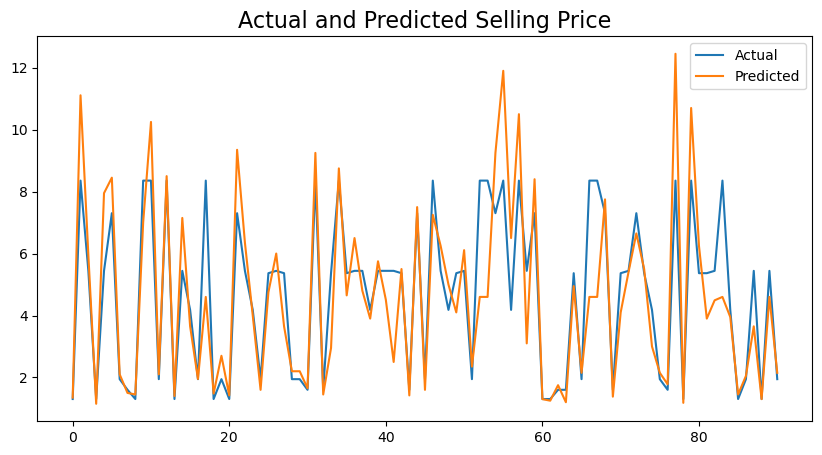

In [71]:
# Visualizing Evaluation metric Score Chart
dt2_score = evaluate_model(dt_model2, y_test, y_pred_dt2)

In [72]:
# Update Evaluate Metric Score Chart
score['Decision Tree Tuned'] = dt2_score
score

,Linear Regression,Linear Regression Tuned,Lasso Regression,Lasso Regression Tuned,Ridge Regression,Ridge Regression Tuned,Decision Tree,Decision Tree Tuned
MSE,3.042736,3.042736,8.987787,3.064508,3.047968,3.310352,1.525186,2.299567
RMSE,1.744344,1.744344,2.997964,1.750574,1.745843,1.819437,1.234984,1.516432
MAE,1.149841,1.149841,2.367435,1.171149,1.151024,1.208118,0.648681,1.018994
Train R2,0.618375,0.618375,-0.102212,0.612290,0.617775,0.586009,1.000000,0.756994
Test R2,0.635721,0.635721,-0.076025,0.633115,0.635095,0.603682,0.817404,0.724694
Adjusted R2,0.584999,0.584999,-0.225851,0.582029,0.584285,0.548498,0.791979,0.686360


- The original Decision Tree model shows better performance across all evaluation metrics compared to the tuned model. However, the perfect Train R2 indicates overfitting, where the model performs exceptionally well on training data but might not generalize as well on unseen data.
- The tuned Decision Tree model, despite having slightly worse metrics, might be more balanced in terms of overfitting and generalization. This is indicated by a lower Train R2 but still reasonable Test R2.

### Model 5 - Random Forest

In [73]:
# Model 5 - Implementation
rf = RandomForestRegressor(random_state = 42)

# Fit the model to the training set
rf.fit(x_train, y_train)

# Prediction
y_pred_rf = rf.predict(x_test)

#### 1. Model and its performance

MSE : 0.693304104553913
RMSE : 0.8326488482871474
MAE : 0.4668865703966964
Train R2 : 0.9814472478466351
Test R2 : 0.9169970818455973
Adjusted R2 : 0.9054397134949842


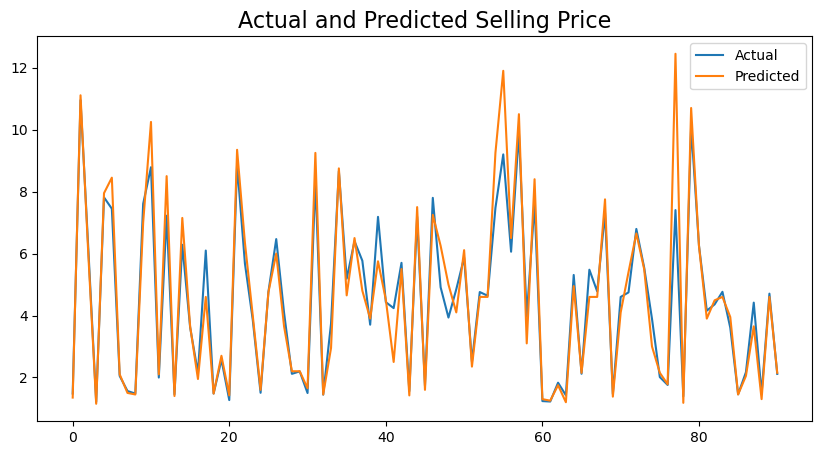

In [74]:
# Visualizing evaluation metric score chart
rf_score = evaluate_model(rf, y_test, y_pred_rf)

In [75]:
# Update evaluation metric score chart
score['Random Forest'] = rf_score
score

,Linear Regression,Linear Regression Tuned,Lasso Regression,Lasso Regression Tuned,Ridge Regression,Ridge Regression Tuned,Decision Tree,Decision Tree Tuned,Random Forest
MSE,3.042736,3.042736,8.987787,3.064508,3.047968,3.310352,1.525186,2.299567,0.693304
RMSE,1.744344,1.744344,2.997964,1.750574,1.745843,1.819437,1.234984,1.516432,0.832649
MAE,1.149841,1.149841,2.367435,1.171149,1.151024,1.208118,0.648681,1.018994,0.466887
Train R2,0.618375,0.618375,-0.102212,0.612290,0.617775,0.586009,1.000000,0.756994,0.981447
Test R2,0.635721,0.635721,-0.076025,0.633115,0.635095,0.603682,0.817404,0.724694,0.916997
Adjusted R2,0.584999,0.584999,-0.225851,0.582029,0.584285,0.548498,0.791979,0.686360,0.905440


#### 2. Cross-Validation and Hyperparameter Tuning

In [76]:
# Model Definition
rf1 = RandomForestRegressor(random_state = 42)

# Find out parameters to be optimized
params = {'n_estimators': [300],
         'min_samples_leaf': np.arange(20, 25)}

# Perform Grid Search
grid_search = GridSearchCV(rf1, params, cv = 5, scoring = 'neg_mean_squared_error')

# Fit the Model
grid_search.fit(x_train, y_train)

# Print the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters are: ", best_params)

Best hyperparameters are:  {'min_samples_leaf': 20, 'n_estimators': 300}


In [77]:
# Train a new Model with best parameters
rf_model2 = RandomForestRegressor(min_samples_leaf = best_params['min_samples_leaf'],
                                 n_estimators = best_params['n_estimators'],
                                 random_state = 42)

# Fit the Model to the training set
rf_model2.fit(x_train, y_train)

# Prediction
y_pred_rf2 = rf_model2.predict(x_test)

MSE : 2.099741961513748
RMSE : 1.4490486401476481
MAE : 0.9559735817911132
Train R2 : 0.7589915400515106
Test R2 : 0.7486172243433791
Adjusted R2 : 0.713614559378533


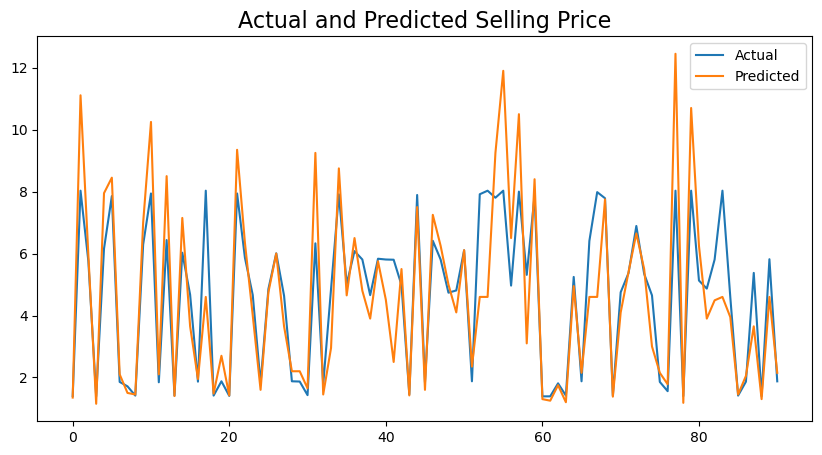

In [78]:
# visualizing the evaluation metric score chart
rf2_score = evaluate_model(rf_model2, y_test, y_pred_rf2)

In [79]:
# Update Evaluation Metric Score Chart
score['Random Forest Tuned'] = rf2_score
score

,Linear Regression,Linear Regression Tuned,Lasso Regression,Lasso Regression Tuned,Ridge Regression,Ridge Regression Tuned,Decision Tree,Decision Tree Tuned,Random Forest,Random Forest Tuned
MSE,3.042736,3.042736,8.987787,3.064508,3.047968,3.310352,1.525186,2.299567,0.693304,2.099742
RMSE,1.744344,1.744344,2.997964,1.750574,1.745843,1.819437,1.234984,1.516432,0.832649,1.449049
MAE,1.149841,1.149841,2.367435,1.171149,1.151024,1.208118,0.648681,1.018994,0.466887,0.955974
Train R2,0.618375,0.618375,-0.102212,0.612290,0.617775,0.586009,1.000000,0.756994,0.981447,0.758992
Test R2,0.635721,0.635721,-0.076025,0.633115,0.635095,0.603682,0.817404,0.724694,0.916997,0.748617
Adjusted R2,0.584999,0.584999,-0.225851,0.582029,0.584285,0.548498,0.791979,0.686360,0.905440,0.713615


##### Original Random Forest Model:

- The original model outperforms the tuned model in all evaluation metrics.
- However, the high Train R2 suggests potential overfitting, which means the model might not generalize well to new, unseen data despite its strong performance on the test set.

##### Tuned Random Forest Model:

- The tuned model shows lower performance metrics but might have been adjusted to prevent overfitting as indicated by the lower Train R2.
- Despite this, the significant drop in performance metrics suggests that the tuning might not have been optimal.

### Model 6 - Xtreme Gradient Boosting Regressor

In [80]:
# Model 6 - Implementation
xgb1 = xgb.XGBRegressor(random_state = 42)

# Fit the model to the Training set
xgb1.fit(x_train, y_train)

# Prediction
y_pred_xgb = xgb1.predict(x_test)

#### 1. Model and its performance

MSE : 0.6324824743177673
RMSE : 0.7952876676509999
MAE : 0.4146084329584143
Train R2 : 0.9999830215034773
Test R2 : 0.9242786957338582
Adjusted R2 : 0.9137352229879397


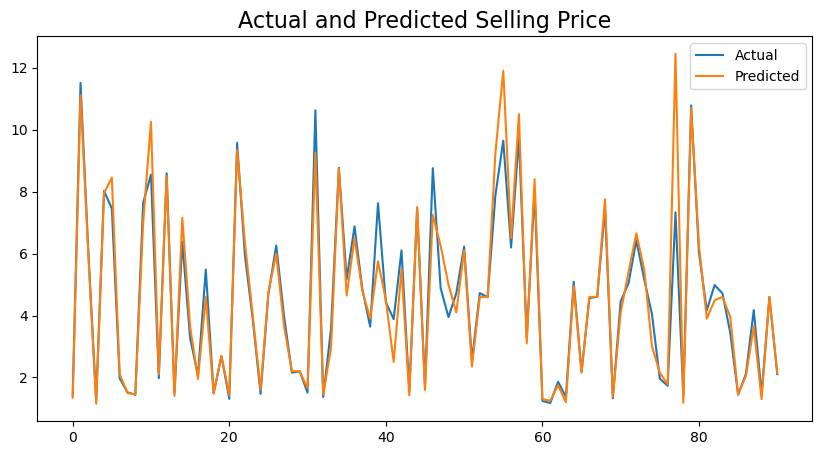

In [81]:
# Visualizing Evaluation metric score chart
xgb_score = evaluate_model(xgb1, y_test, y_pred_xgb)

In [82]:
# Update the Evaluation metric score chart
score['XGB'] = xgb_score
score

,Linear Regression,Linear Regression Tuned,Lasso Regression,Lasso Regression Tuned,Ridge Regression,Ridge Regression Tuned,Decision Tree,Decision Tree Tuned,Random Forest,Random Forest Tuned,XGB
MSE,3.042736,3.042736,8.987787,3.064508,3.047968,3.310352,1.525186,2.299567,0.693304,2.099742,0.632482
RMSE,1.744344,1.744344,2.997964,1.750574,1.745843,1.819437,1.234984,1.516432,0.832649,1.449049,0.795288
MAE,1.149841,1.149841,2.367435,1.171149,1.151024,1.208118,0.648681,1.018994,0.466887,0.955974,0.414608
Train R2,0.618375,0.618375,-0.102212,0.612290,0.617775,0.586009,1.000000,0.756994,0.981447,0.758992,0.999983
Test R2,0.635721,0.635721,-0.076025,0.633115,0.635095,0.603682,0.817404,0.724694,0.916997,0.748617,0.924279
Adjusted R2,0.584999,0.584999,-0.225851,0.582029,0.584285,0.548498,0.791979,0.686360,0.905440,0.713615,0.913735


#### 2. Cross-Validation and Hyperparameter Tuning

In [83]:
# Model Definition 
xgb2 = XGBRegressor(random_state = 42)

# Finding the parameters to be optimized
params = {'n_estimators': [500],
         'min_samples_leaf': np.arange(20, 25)}

# Perform Grid Search
grid_search = GridSearchCV(xgb2, params, cv = 5, scoring = 'neg_mean_squared_error')

# Fit the model
grid_search.fit(x_train, y_train)

# Print the parameters
best_params = grid_search.best_params_
print("Best Parameters are: ", best_params)

Best Parameters are:  {'min_samples_leaf': 20, 'n_estimators': 500}


In [84]:
# Train a new model with best parameters
xgb_model2 = XGBRegressor(min_samples_leaf = best_params['min_samples_leaf'],
                          n_estimators = best_params['n_estimators'], 
                          random_state = 42)

# Fit the Model to the training set
xgb_model2.fit(x_train, y_train)

# Prediction 
y_pred_xgb2 = xgb_model2.predict(x_test)

MSE : 0.6324824758892937
RMSE : 0.7952876686390238
MAE : 0.4146084277184456
Train R2 : 0.999983021505416
Test R2 : 0.9242786955457138
Adjusted R2 : 0.9137352227735981


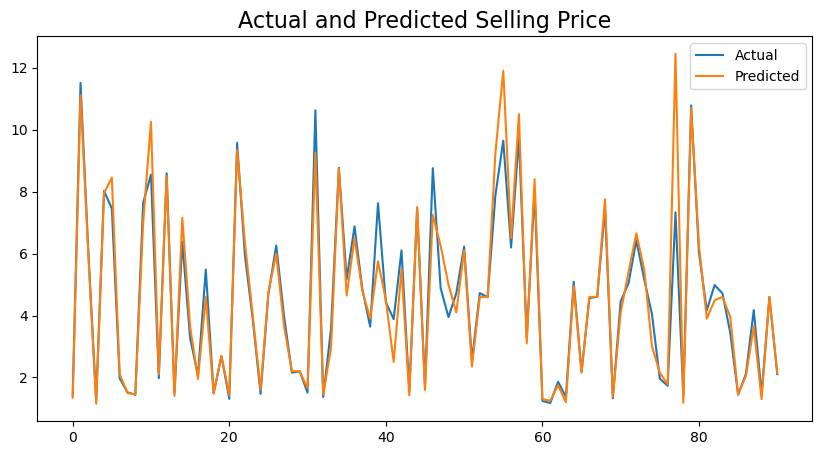

In [85]:
# Visualizing evaluation metric score chart
xgb2_score = evaluate_model(xgb_model2, y_test, y_pred_xgb2)

In [86]:
# Update Evaluation Metric Score Chart
score['XGB Tuned'] = xgb2_score
score

,Linear Regression,Linear Regression Tuned,Lasso Regression,Lasso Regression Tuned,Ridge Regression,Ridge Regression Tuned,Decision Tree,Decision Tree Tuned,Random Forest,Random Forest Tuned,XGB,XGB Tuned
MSE,3.042736,3.042736,8.987787,3.064508,3.047968,3.310352,1.525186,2.299567,0.693304,2.099742,0.632482,0.632482
RMSE,1.744344,1.744344,2.997964,1.750574,1.745843,1.819437,1.234984,1.516432,0.832649,1.449049,0.795288,0.795288
MAE,1.149841,1.149841,2.367435,1.171149,1.151024,1.208118,0.648681,1.018994,0.466887,0.955974,0.414608,0.414608
Train R2,0.618375,0.618375,-0.102212,0.612290,0.617775,0.586009,1.000000,0.756994,0.981447,0.758992,0.999983,0.999983
Test R2,0.635721,0.635721,-0.076025,0.633115,0.635095,0.603682,0.817404,0.724694,0.916997,0.748617,0.924279,0.924279
Adjusted R2,0.584999,0.584999,-0.225851,0.582029,0.584285,0.548498,0.791979,0.686360,0.905440,0.713615,0.913735,0.913735


**Identical Performance**: The evaluation metrics for both the original and tuned XGB models are identical. This suggests that the tuning process did not result in any changes to the model's performance.

**Potential Overfitting**: The extremely high Train R2 value for both models suggests potential overfitting. This means that while the model performs very well on the training data, it might not generalize well to new, unseen data.

### Plot R2 Scores for Each Model

In [87]:
score.columns

Index(['Linear Regression', 'Linear Regression Tuned', 'Lasso Regression',
       'Lasso Regression Tuned', 'Ridge Regression', 'Ridge Regression Tuned',
       'Decision Tree', 'Decision Tree Tuned', 'Random Forest',
       'Random Forest Tuned', 'XGB', 'XGB Tuned'],
      dtype='object')

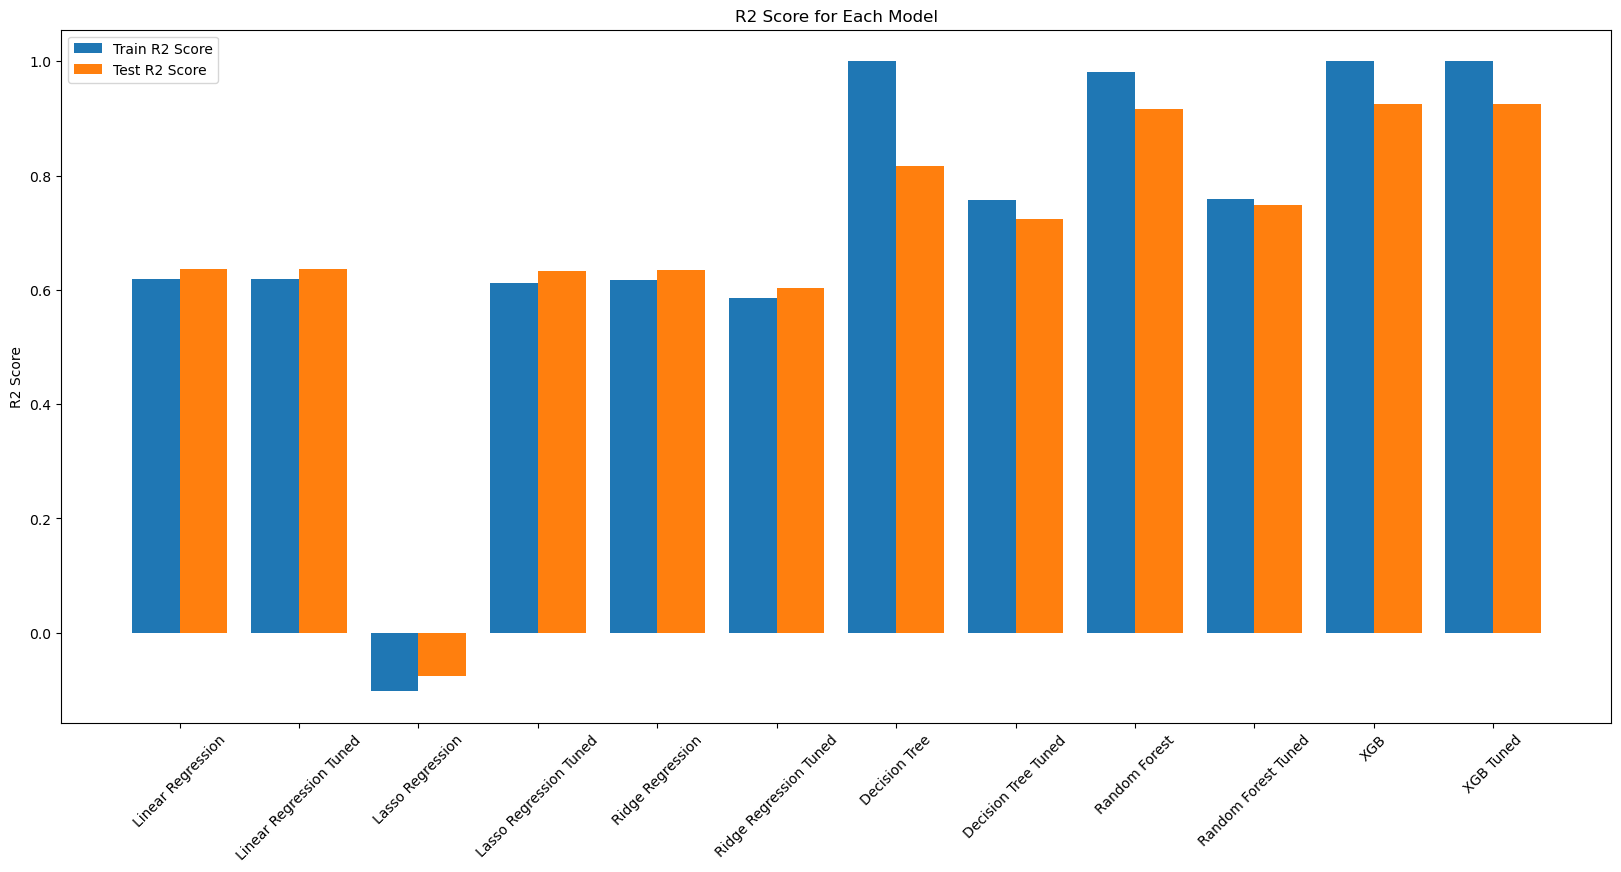

In [88]:
# R2 Score Plot
models = list(score.columns)
train = score.iloc[-3, :]
test = score.iloc[-2, :]

x_axis = np.arange(len(models))

plt.figure(figsize = (20, 9))
plt.bar(x_axis - 0.2, train, 0.4, label = 'Train R2 Score')
plt.bar(x_axis + 0.2, test, 0.4, label = 'Test R2 Score')
plt.xticks(x_axis, models, rotation = 45)
plt.ylabel('R2 Score')
plt.title('R2 Score for Each Model')
plt.legend()
plt.show()